In [1]:
%matplotlib inline
import copy
import numpy as np
import matplotlib.pyplot as plt

In [2]:
import torch
from p2ch13.dsets import getCandidateInfoList, getCt, build2dLungMask
from p2ch13.model import SegmentationMask, MaskTuple
from p2ch13.vis import build2dLungMask
from util.util import xyz2irc


candidateInfo_list = getCandidateInfoList(requireOnDisk_bool=False)
candidateInfo_list[0]

CandidateInfoTuple(isNodule_bool=True, hasAnnotation_bool=True, isMal_bool=True, diameter_mm=32.27003025, series_uid='1.3.6.1.4.1.14519.5.2.1.6279.6001.287966244644280690737019247886', center_xyz=(67.82725575, 85.37992457, -109.74672379999998))

In [3]:
series_list = sorted(set(t.series_uid for t in candidateInfo_list))

In [4]:
def transparent_cmap(cmap, N=255):
    "Copy colormap and set alpha values"

    mycmap = copy.deepcopy(cmap)
    mycmap._init()
    mycmap._lut[:,-1] = np.linspace(0, 0.75, N+4)
    return mycmap
tgray = transparent_cmap(plt.cm.gray)
tpurp = transparent_cmap(plt.cm.Purples)
tblue = transparent_cmap(plt.cm.Blues)
tgreen = transparent_cmap(plt.cm.Greens)
torange = transparent_cmap(plt.cm.Oranges)
tred = transparent_cmap(plt.cm.Reds)


clim=(0, 1.3)
start_ndx = 3
mask_model = SegmentationMask().to('cuda')


c:\Users\ADMIN\Miniconda3\envs\ling1\lib\site-packages\torch\cuda\__init__.py:235: UserWarning: 
NVIDIA GeForce RTX 5070 Ti with CUDA capability sm_120 is not compatible with the current PyTorch installation.
The current PyTorch install supports CUDA capabilities sm_50 sm_60 sm_61 sm_70 sm_75 sm_80 sm_86 sm_90.
If you want to use the NVIDIA GeForce RTX 5070 Ti GPU with PyTorch, please check the instructions at https://pytorch.org/get-started/locally/

  warnings.warn(


In [ ]:
ct_list = []
for nit_ndx in range(start_ndx, start_ndx+3):
    candidateInfo_tup = candidateInfo_list[nit_ndx]
    ct = getCt(candidateInfo_tup.series_uid)
    center_irc = xyz2irc(candidateInfo_tup.center_xyz, ct.origin_xyz, ct.vxSize_xyz, ct.direction_a)
    
    ct_list.append((ct, center_irc))
start_ndx = nit_ndx + 1

fig = plt.figure(figsize=(60,90))
subplot_ndx = 0 
for ct_ndx, (ct, center_irc) in enumerate(ct_list):
    mask_tup = build2dLungMask(ct.series_uid, int(center_irc.index))
#    old_tup = old_build2dLungMask(ct.series_uid, int(center_irc.index))
    
#    ct_g = torch.from_numpy(ct.hu_a[int(center_irc.index)].astype(np.float32)).unsqueeze(0).unsqueeze(0).to('cuda')
#    pos_g = torch.from_numpy(ct.positive_mask[int(center_irc.index)].astype(np.float32)).unsqueeze(0).unsqueeze(0).to('cuda')
#    input_g = ct_g / 1000
    
#    label_g, neg_g, pos_g, lung_mask, mask_dict = mask_model(input_g, pos_g)
#    mask_tup = MaskTuple(**mask_dict)
    for attr_ndx, attr_str in enumerate(mask_tup._fields):

        subplot_ndx = 1 + 3 * 2 * attr_ndx + 2 * ct_ndx
        subplot = fig.add_subplot(len(mask_tup), len(ct_list)*2, subplot_ndx)
        subplot.set_title(attr_str)
        
        
        #print(layer_func, ct.hu_a.shape, layer_func(ct, mask_tup, int(center_irc.index)).shape, center_irc.index)

        plt.imshow(ct.hu_a[int(center_irc.index)], clim=(-1000, 3000), cmap='RdGy')
        plt.imshow(mask_tup[attr_ndx][0][0].cpu(), clim=clim, cmap=tblue)

        subplot = fig.add_subplot(len(mask_tup), len(ct_list)*2, subplot_ndx+1)
        subplot.set_title('old '+ attr_str)

        plt.imshow(ct.hu_a[int(center_irc.index)], clim=(-1000, 3000), cmap='RdGy')
#        plt.imshow(old_tup[attr_ndx], clim=clim, cmap=tblue)
        
        #if attr_ndx == 1: break
    #break


NameError: name 'start_ndx' is not defined

CandidateInfoTuple(isNodule_bool=True, diameter_mm=32.27003025, series_uid='1.3.6.1.4.1.14519.5.2.1.6279.6001.287966244644280690737019247886', center_xyz=(67.61451718, 85.02525992, -109.8084416)) center_irc IrcTuple(index=91, row=360, col=341)
0.0035247802734375


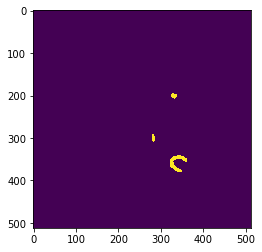

In [17]:
nit_ndx = 0
candidateInfo_tup = candidateInfo_list[nit_ndx]
ct = getCt(candidateInfo_tup.series_uid)
center_irc = xyz2irc(candidateInfo_tup.center_xyz, ct.origin_xyz, ct.vxSize_xyz, ct.direction_a)
print(candidateInfo_tup, 'center_irc', center_irc)

mask_tup = build2dLungMask(ct.series_uid, int(center_irc.index))
mask_tup = mask_tup._make(x.cpu().numpy()[0][0] for x in mask_tup)

print(mask_tup.pos_mask.sum() / (512*512))

plt.imshow(mask_tup.pos_mask)


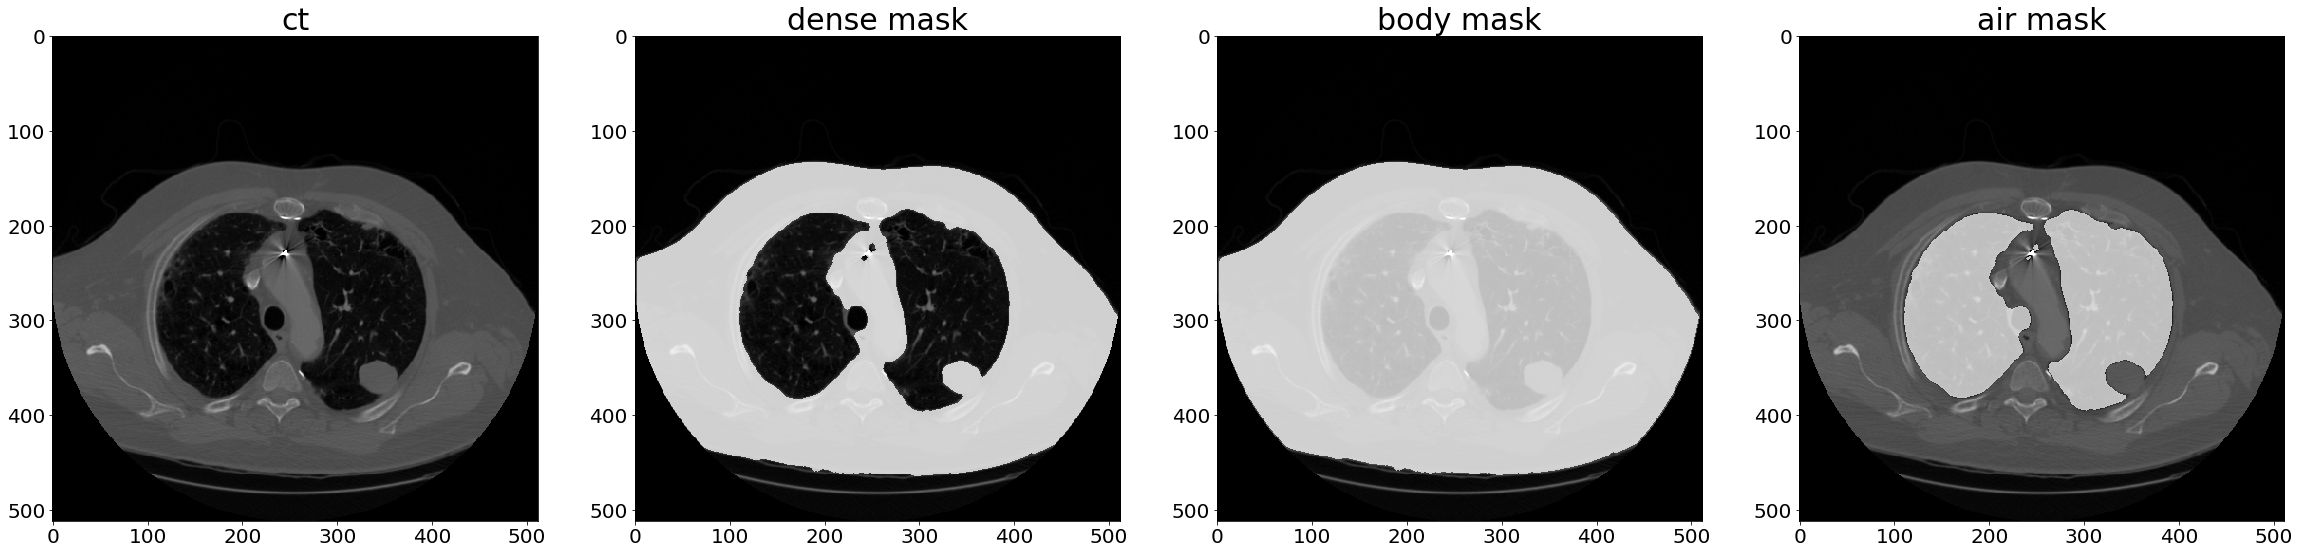

In [7]:
fig = plt.figure(figsize=(40,10))

#subplot = fig.add_subplot(1, 4, 1)
#subplot.set_title('ct', fontsize=30)
#plt.imshow(ct.hu_a[int(center_irc.index)], clim=(-1000, 1000), cmap='gray')

subplot = fig.add_subplot(1, 4, 1)
subplot.set_title('ct', fontsize=30)
for label in (subplot.get_xticklabels() + subplot.get_yticklabels()):
    label.set_fontsize(20)
plt.imshow(ct.hu_a[int(center_irc.index)], clim=(-1000, 2000), cmap='gray')

#subplot = fig.add_subplot(1, 4, 3)
#subplot.set_title('ct annotation example', fontsize=30)
#plt.imshow(ct.hu_a[int(center_irc.index)], clim=(-1000, 3000), cmap='gray')

#subplot = fig.add_subplot(1, 4, 2)
#subplot.set_title('raw_dense mask', fontsize=30)
#plt.imshow(ct.hu_a[int(center_irc.index)], clim=(-1000, 2000), cmap='gray')
#plt.imshow(mask_tup.dense_mask, clim=(0,1), cmap=tgray)

subplot = fig.add_subplot(1, 4, 2)
subplot.set_title('dense mask', fontsize=30)
for label in (subplot.get_xticklabels() + subplot.get_yticklabels()):
    label.set_fontsize(20)
plt.imshow(ct.hu_a[int(center_irc.index)], clim=(-1000, 2000), cmap='gray')
plt.imshow(mask_tup.dense_mask, clim=(0,1), cmap=tgray)


#subplot = fig.add_subplot(1, 3, 2)
#subplot.set_title('denoise mask', fontsize=30)
#plt.imshow(ct.hu_a[int(center_irc.index)], clim=(-1000, 2000), cmap='gray')
#plt.imshow(mask_tup.denoise_mask, clim=(0,0.5), cmap=tgray)

subplot = fig.add_subplot(1, 4, 3)
subplot.set_title('body mask', fontsize=30)
for label in (subplot.get_xticklabels() + subplot.get_yticklabels()):
    label.set_fontsize(20)
plt.imshow(ct.hu_a[int(center_irc.index)], clim=(-1000, 2000), cmap='gray')
plt.imshow(mask_tup.body_mask, clim=(0,1), cmap=tgray)

subplot = fig.add_subplot(1, 4, 4)
subplot.set_title('air mask', fontsize=30)
for label in (subplot.get_xticklabels() + subplot.get_yticklabels()):
    label.set_fontsize(20)
plt.imshow(ct.hu_a[int(center_irc.index)], clim=(-1000, 2000), cmap='gray')
plt.imshow(mask_tup.air_mask, clim=(0,1), cmap=tgray)


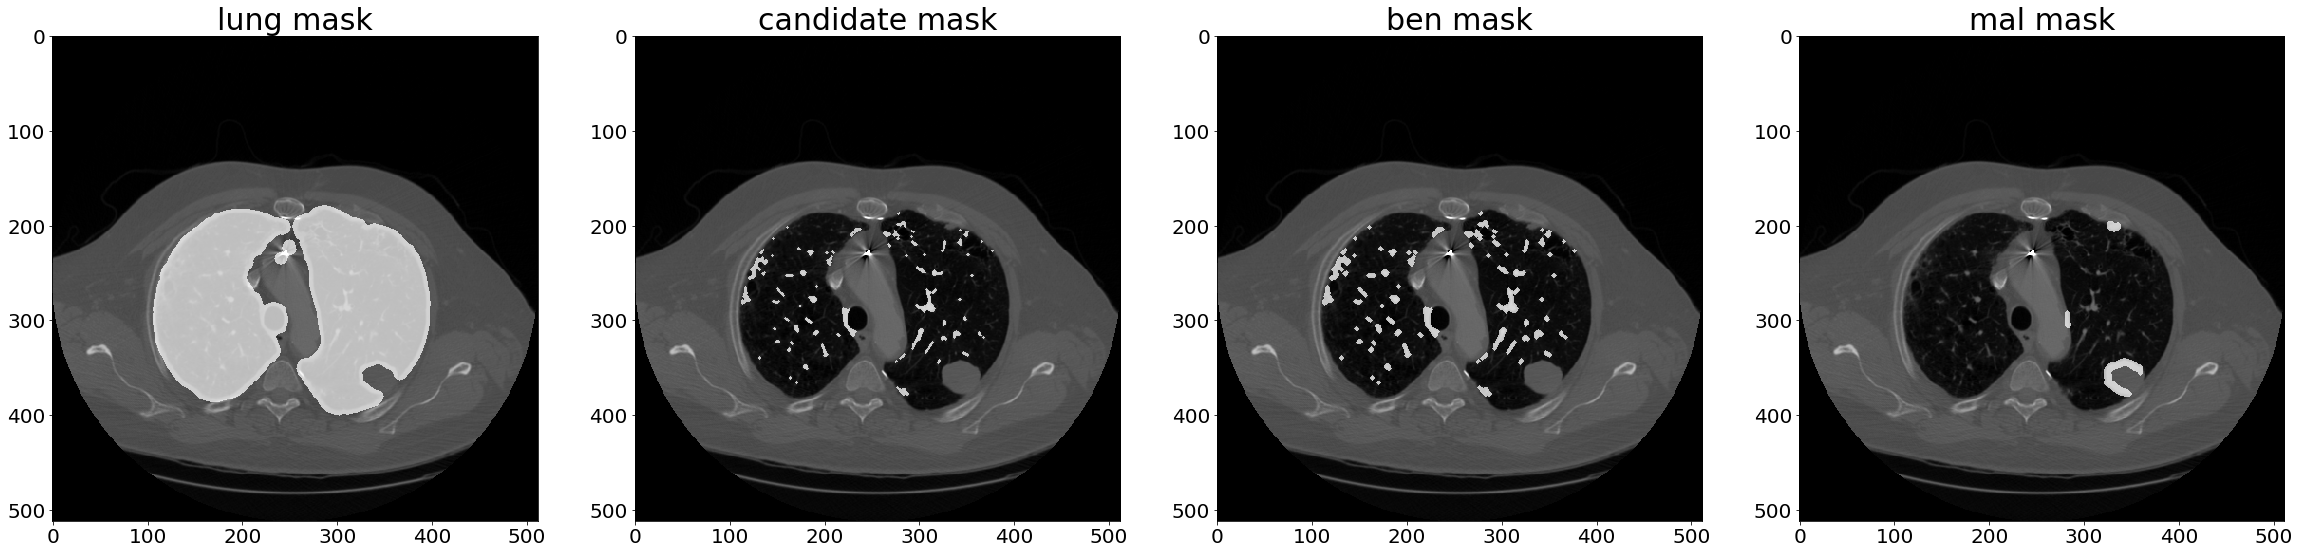

In [8]:
fig = plt.figure(figsize=(40,10))

subplot = fig.add_subplot(1, 4, 1)
subplot.set_title('lung mask', fontsize=30)
for label in (subplot.get_xticklabels() + subplot.get_yticklabels()):
    label.set_fontsize(20)
plt.imshow(ct.hu_a[int(center_irc.index)], clim=(-1000, 2000), cmap='gray')
plt.imshow(mask_tup.lung_mask, clim=(0,1), cmap=tgray)

subplot = fig.add_subplot(1, 4, 2)
subplot.set_title('candidate mask', fontsize=30)
for label in (subplot.get_xticklabels() + subplot.get_yticklabels()):
    label.set_fontsize(20)
plt.imshow(ct.hu_a[int(center_irc.index)], clim=(-1000, 2000), cmap='gray')
plt.imshow(mask_tup.candidate_mask, clim=(0,1), cmap=tgray)

subplot = fig.add_subplot(1, 4, 3)
subplot.set_title('ben mask', fontsize=30)
for label in (subplot.get_xticklabels() + subplot.get_yticklabels()):
    label.set_fontsize(20)
plt.imshow(ct.hu_a[int(center_irc.index)], clim=(-1000, 2000), cmap='gray')
plt.imshow(mask_tup.neg_mask, clim=(0,1), cmap=tgray)

subplot = fig.add_subplot(1, 4, 4)
subplot.set_title('mal mask', fontsize=30)
for label in (subplot.get_xticklabels() + subplot.get_yticklabels()):
    label.set_fontsize(20)
plt.imshow(ct.hu_a[int(center_irc.index)], clim=(-1000, 2000), cmap='gray')
plt.imshow(mask_tup.pos_mask, clim=(0,1), cmap=tgray)



CandidateInfoTuple(isNodule_bool=True, diameter_mm=30.61040636, series_uid='1.3.6.1.4.1.14519.5.2.1.6279.6001.112740418331256326754121315800', center_xyz=(47.90350511, 37.60442008, -99.93417567)) center_irc IrcTuple(index=114, row=328, col=334)


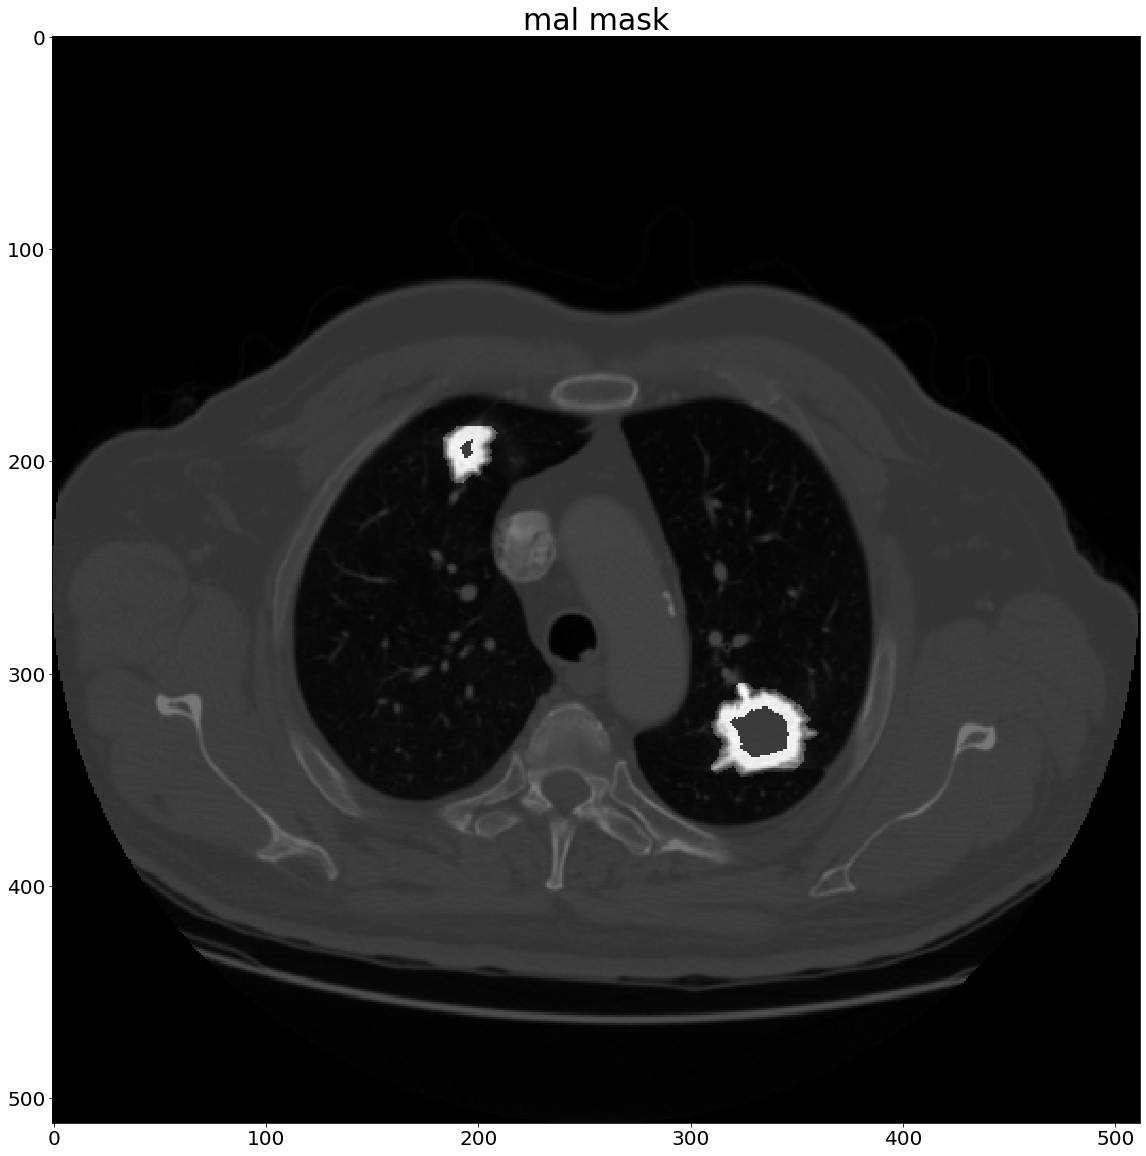

In [9]:
nit_ndx = 1
candidateInfo_tup = candidateInfo_list[nit_ndx]
ct = getCt(candidateInfo_tup.series_uid)
center_irc = xyz2irc(candidateInfo_tup.center_xyz, ct.origin_xyz, ct.vxSize_xyz, ct.direction_a)
print(candidateInfo_tup, 'center_irc', center_irc)

mask_tup = build2dLungMask(ct.series_uid, int(center_irc.index))
mask_tup = mask_tup._make(x.cpu().numpy()[0][0] for x in mask_tup)


fig = plt.figure(figsize=(20,20))

slice_a = ((ct.hu_a[int(center_irc.index)] / 1000) + 1) / 2
slice_a = slice_a.clip(0, 1)

subplot = fig.add_subplot(1, 1, 1)
subplot.set_title('mal mask', fontsize=30)
for label in (subplot.get_xticklabels() + subplot.get_yticklabels()):
    label.set_fontsize(20)
plt.imshow(
    slice_a + 3 * slice_a * mask_tup.pos_mask, 
    #clim=(-2000, 2000), 
    cmap='gray',
)
#plt.imshow(ct.hu_a[int(center_irc.index)] * mask_tup.pos_mask, clim=(-1000,1000), cmap='gray')



In [10]:
from p2ch13.training import LunaTrainingApp

cls_app = LunaTrainingApp(['--augmented', '--balanced'])
train_dl = cls_app.initTrainDl()

_ = train_dl.dataset[0]

C:\Users\elis\Miniconda3\envs\book\lib\site-packages\tensorboard\compat\tensorflow_stub\dtypes.py:541: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
C:\Users\elis\Miniconda3\envs\book\lib\site-packages\tensorboard\compat\tensorflow_stub\dtypes.py:542: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
C:\Users\elis\Miniconda3\envs\book\lib\site-packages\tensorboard\compat\tensorflow_stub\dtypes.py:543: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
C:\Users\elis\Miniconda3\envs\book\lib\site-packages\te

ImportError: TensorBoard logging requires TensorBoard with Python summary writer installed. This should be available in 1.14 or above.

In [ ]:
sample_ndx = 40

#while train_dl.dataset[sample_ndx][1][0]:
#    sample_ndx += 1

fig = plt.figure(figsize=(40,10))

candidate_t, pos_t, series_uid, center_irc = train_dl.dataset[sample_ndx]
subplot = fig.add_subplot(1, 4, 1)
subplot.set_title('augmented nodule 1', fontsize=30)
plt.imshow(candidate_t[0,12], clim=(-1000, 500), cmap='gray')

candidate_t, pos_t, series_uid, center_irc = train_dl.dataset[sample_ndx]
subplot = fig.add_subplot(1, 4, 2)
subplot.set_title('augmented nodule 2', fontsize=30)
plt.imshow(candidate_t[0,12], clim=(-1000, 500), cmap='gray')

candidate_t, pos_t, series_uid, center_irc = train_dl.dataset[sample_ndx]
subplot = fig.add_subplot(1, 4, 3)
subplot.set_title('augmented nodule 3', fontsize=30)
plt.imshow(candidate_t[0,12], clim=(-1000, 500), cmap='gray')

candidate_t, pos_t, series_uid, center_irc = train_dl.dataset[sample_ndx]
subplot = fig.add_subplot(1, 4, 4)
subplot.set_title('augmented nodule 4', fontsize=30)
plt.imshow(candidate_t[0,12], clim=(-1000, 500), cmap='gray')


print([sample_ndx, pos_t, series_uid, center_irc])


a
yo


2020-01-14 23:03:44,698 INFO     pid:20100 p2ch13.dsets:548:__init__ <p2ch13.dsets.TrainingLuna2dSegmentationDataset object at 0x00000207E7D91908>: 888 general series, 169213 slices


dawg
sup
yo


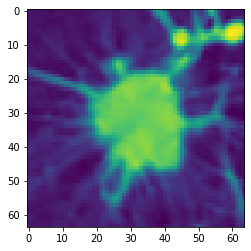

In [2]:
print('a')
from p2ch13.dsets import TrainingLuna2dSegmentationDataset
print('yo')

ds = TrainingLuna2dSegmentationDataset(contextSlices_count=3, batch_size=4)
print('dawg')

input_t, label_int, raw_pos_t, series_uid, ct_ndx = ds[0]
print('sup')

plt.imshow(input_t[3])
print('yo')
